_Lambda School Data Science_

# Make explanatory visualizations




Tody we will reproduce this [example by FiveThirtyEight:](https://fivethirtyeight.com/features/al-gores-new-movie-exposes-the-big-flaw-in-online-movie-ratings/)

In [38]:
from IPython.display import display, Image

url = 'https://fivethirtyeight.com/wp-content/uploads/2017/09/mehtahickey-inconvenient-0830-1.png'
example = Image(url=url, width=400)

display(example)

Using this data: https://github.com/fivethirtyeight/data/tree/master/inconvenient-sequel

Objectives
- add emphasis and annotations to transform visualizations from exploratory to explanatory
- remove clutter from visualizations

Links
- [Strong Titles Are The Biggest Bang for Your Buck](http://stephanieevergreen.com/strong-titles/)
- [Remove to improve (the data-ink ratio)](https://www.darkhorseanalytics.com/blog/data-looks-better-naked)
- [How to Generate FiveThirtyEight Graphs in Python](https://www.dataquest.io/blog/making-538-plots/)

## Make prototypes

This  helps us understand the problem

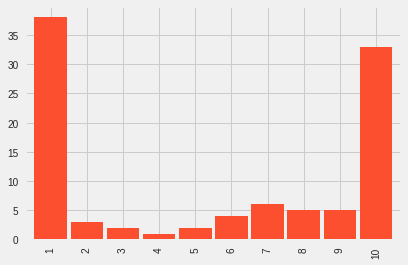

In [39]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


plt.style.use('fivethirtyeight')

fake = pd.Series([38, 3, 2, 1, 2, 4, 6, 5, 5, 33], 
                 index=range(1,11))

fake.plot.bar(color='C1', width=0.9);

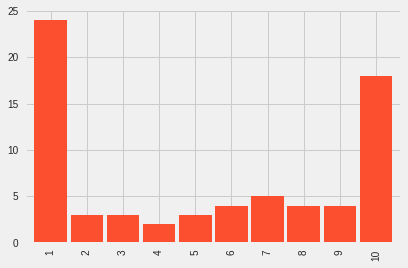

In [40]:
fake2 = pd.Series(
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
     2, 2, 2, 
     3, 3, 3,
     4, 4,
     5, 5, 5,
     6, 6, 6, 6,
     7, 7, 7, 7, 7,
     8, 8, 8, 8,
     9, 9, 9, 9, 
     10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10])

fake2.value_counts().sort_index().plot.bar(color='C1', width=0.9);

## Annotate with text

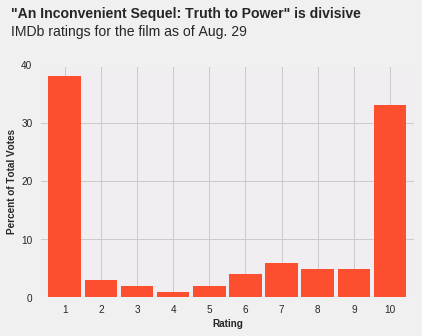

<Figure size 432x288 with 0 Axes>

In [41]:
ax = fake.plot.bar(color='C1', width=0.9);

#plt.title('An Inconvenient Sequel: "Truth to Power" is divisive')
plt.ylabel('Percent of Total Votes', fontsize=10, fontweight='bold')
plt.xlabel('Rating', fontsize=10, fontweight='bold')

ax.text(x=-1.5, y=48, s='"An Inconvenient Sequel: Truth to Power" is divisive', 
        fontsize=14, fontweight='bold')
ax.text(x=-1.5, y=45, s='IMDb ratings for the film as of Aug. 29', 
        fontsize=14)

ax.tick_params(labelrotation=0)
ax.set(yticks=(0, 10, 20, 30, 40),
      facecolor='#f0eef1')
fig = plt.figure()
fig.patch.set_facecolor('#f9f9f9');

In [42]:
display(example)

## Reproduce with real data

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/inconvenient-sequel/ratings.csv')
pd.set_option('display.max_columns', 500)

In [44]:
df.shape

(80053, 27)

In [0]:
## change date to timestamp object

df['timestamp'] = pd.to_datetime(df['timestamp'])

In [46]:
df.head()

,timestamp,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
0,2017-07-17 12:28:32.785639,402,Males,http://www.imdb.com/title/tt6322922/ratings-male,4.6,5.0,2,197,7,7,3,7,7,11,8,20,135,49.0,1.7,1.7,0.7,1.7,1.7,2.7,2.0,5.0,33.6
1,2017-07-17 12:28:33.025600,78,Females,http://www.imdb.com/title/tt6322922/ratings-fe...,6.9,7.7,10,16,1,0,1,1,0,3,4,3,49,20.5,1.3,0.0,1.3,1.3,0.0,3.8,5.1,3.8,62.8
2,2017-07-17 12:28:33.273919,4,Aged under 18,http://www.imdb.com/title/tt6322922/ratings-age_1,4.2,4.2,3,2,0,0,0,1,0,0,0,0,1,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
3,2017-07-17 12:28:33.495325,4,Males under 18,http://www.imdb.com/title/tt6322922/ratings-ma...,4.2,4.2,3,2,0,0,0,1,0,0,0,0,1,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
4,2017-07-17 12:28:33.722849,130,Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-age_2,6.3,6.5,9,41,0,3,1,2,3,6,4,6,64,31.5,0.0,2.3,0.8,1.5,2.3,4.6,3.1,4.6,49.2


In [47]:
df.dtypes

timestamp      datetime64[ns]
respondents             int64
category               object
link                   object
average               float64
mean                  float64
median                  int64
1_votes                 int64
2_votes                 int64
3_votes                 int64
4_votes                 int64
5_votes                 int64
6_votes                 int64
7_votes                 int64
8_votes                 int64
9_votes                 int64
10_votes                int64
1_pct                 float64
2_pct                 float64
3_pct                 float64
4_pct                 float64
5_pct                 float64
6_pct                 float64
7_pct                 float64
8_pct                 float64
9_pct                 float64
10_pct                float64
dtype: object

In [0]:
df.set_index('timestamp', inplace=True)

In [49]:
df['2017-08-29']

,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-08-29 00:00:02.248882,1682,Males,http://www.imdb.com/title/tt6322922/ratings-male,5.3,5.3,6,671,50,29,12,42,79,107,90,83,519,39.9,3.0,1.7,0.7,2.5,4.7,6.4,5.4,4.9,30.9
2017-08-29 00:00:02.499363,257,Females,http://www.imdb.com/title/tt6322922/ratings-fe...,6.9,7.3,10,53,3,4,4,4,5,14,13,26,131,20.6,1.2,1.6,1.6,1.6,1.9,5.4,5.1,10.1,51.0
2017-08-29 00:00:02.727204,15,Aged under 18,http://www.imdb.com/title/tt6322922/ratings-age_1,4.5,5.3,5,7,0,0,0,1,0,1,0,0,6,46.7,0.0,0.0,0.0,6.7,0.0,6.7,0.0,0.0,40.0
2017-08-29 00:00:03.024270,13,Males under 18,http://www.imdb.com/title/tt6322922/ratings-ma...,5.3,5.9,7,5,0,0,0,1,0,1,0,0,6,38.5,0.0,0.0,0.0,7.7,0.0,7.7,0.0,0.0,46.2
2017-08-29 00:00:03.248207,2,Females under 18,http://www.imdb.com/title/tt6322922/ratings-fe...,1.0,1.0,1,2,0,0,0,0,0,0,0,0,0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-08-29 00:00:03.441529,450,Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-age_2,6.4,6.6,8,117,3,6,7,17,24,35,28,23,190,26.0,0.7,1.3,1.6,3.8,5.3,7.8,6.2,5.1,42.2
2017-08-29 00:00:03.636825,402,Males Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-ma...,6.3,6.5,8,112,3,4,6,15,20,33,25,21,163,27.9,0.7,1.0,1.5,3.7,5.0,8.2,6.2,5.2,40.5
2017-08-29 00:00:03.839446,41,Females Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-fe...,7.1,7.9,10,4,0,2,1,2,2,2,3,2,23,9.8,0.0,4.9,2.4,4.9,4.9,4.9,7.3,4.9,56.1
2017-08-29 00:00:04.030663,771,Aged 30-44,http://www.imdb.com/title/tt6322922/ratings-age_3,5.6,5.6,7,287,21,12,4,21,36,53,38,49,250,37.2,2.7,1.6,0.5,2.7,4.7,6.9,4.9,6.4,32.4


In [50]:
# what category are you interested in?
df['category'].value_counts()

Males Aged 45+        4216
Females Aged 18-29    4216
Males under 18        4216
Aged 30-44            4216
Females Aged 45+      4216
Non-US users          4216
Females Aged 30-44    4216
Males                 4216
Aged 18-29            4216
Aged 45+              4216
US users              4216
Males Aged 30-44      4216
Females               4216
Top 1000 voters       4216
IMDb staff            4216
Males Aged 18-29      4216
Aged under 18         4216
IMDb users            4216
Females under 18      4165
Name: category, dtype: int64

In [0]:
lastday = df['2017-08-29']

In [52]:
lastday[lastday['category'] == 'IMDb users']

,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-08-29 00:00:06.288486,2646,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1020,67,39,24,55,107,152,145,144,893,38.5,2.5,1.5,0.9,2.1,4.0,5.7,5.5,5.4,33.7
2017-08-29 00:10:06.763461,2646,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1020,67,39,24,55,107,152,145,144,893,38.5,2.5,1.5,0.9,2.1,4.0,5.7,5.5,5.4,33.7
2017-08-29 00:20:05.745307,2646,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1020,67,39,24,55,107,152,145,144,893,38.5,2.5,1.5,0.9,2.1,4.0,5.7,5.5,5.4,33.7
2017-08-29 00:30:05.818552,2646,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1020,67,39,24,55,107,152,145,144,893,38.5,2.5,1.5,0.9,2.1,4.0,5.7,5.5,5.4,33.7
2017-08-29 00:40:06.180928,2646,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1020,67,39,24,55,107,152,145,144,893,38.5,2.5,1.5,0.9,2.1,4.0,5.7,5.5,5.4,33.7
2017-08-29 00:50:05.826082,2646,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1020,67,39,24,55,107,152,145,144,893,38.5,2.5,1.5,0.9,2.1,4.0,5.7,5.5,5.4,33.7
2017-08-29 01:00:05.483262,2646,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1020,67,39,24,55,107,152,145,144,893,38.5,2.5,1.5,0.9,2.1,4.0,5.7,5.5,5.4,33.7
2017-08-29 01:10:06.038644,2646,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1020,67,39,24,55,107,152,145,144,893,38.5,2.5,1.5,0.9,2.1,4.0,5.7,5.5,5.4,33.7
2017-08-29 01:20:05.807155,2646,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1020,67,39,24,55,107,152,145,144,893,38.5,2.5,1.5,0.9,2.1,4.0,5.7,5.5,5.4,33.7


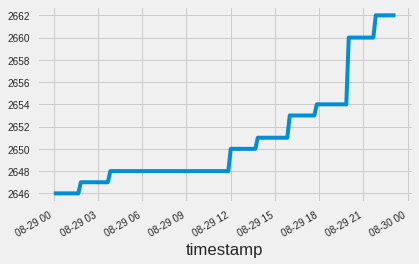

In [53]:
lastday[lastday['category'] == 'IMDb users']['respondents'].plot()

In [54]:
final = lastday[lastday['category'] == 'IMDb users'].tail(1)
final

,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-08-29 23:10:06.218251,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7


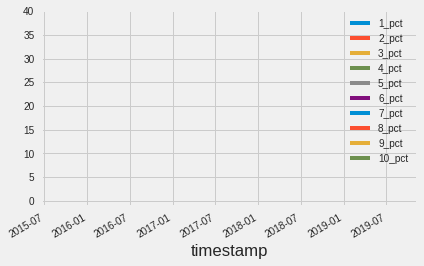

In [55]:
pct_columns = ['1_pct', '2_pct', '3_pct', '4_pct', '5_pct', '6_pct', '7_pct', '8_pct', '9_pct', '10_pct']

final[pct_columns].plot()

In [0]:
data = final[pct_columns].T
data.index = range(1, 11)


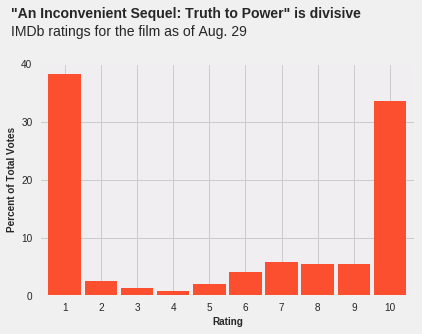

<Figure size 432x288 with 0 Axes>

In [57]:
ax = data.plot.bar(color='C1', width=0.9);

plt.ylabel('Percent of Total Votes', fontsize=10, fontweight='bold')
plt.xlabel('Rating', fontsize=10, fontweight='bold')

ax.text(x=-1.5, y=48, s='"An Inconvenient Sequel: Truth to Power" is divisive', 
        fontsize=14, fontweight='bold')
ax.text(x=-1.5, y=45, s='IMDb ratings for the film as of Aug. 29', 
        fontsize=14)

ax.tick_params(labelrotation=0)
ax.set(yticks=range(0, 50, 10),
      facecolor='#f0eef1')
fig = plt.figure()
fig.patch.set_facecolor('#f9f9f9');
ax.get_legend().remove()

# ASSIGNMENT

Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

# STRETCH OPTIONS

#### Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

For example:
- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) (try the [`altair`](https://altair-viz.github.io/gallery/index.html#maps) library)
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) (try the [`statsmodels`](https://www.statsmodels.org/stable/index.html) library)
- or another example of your choice!

#### Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!









In [0]:
# importing thanksgiving data from survey monkey survey

url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/thanksgiving-2015/thanksgiving-2015-poll-data.csv'
tg_df = pd.read_csv(url)

In [0]:
# dropping any empty values that are in the 'US Region' column, because there is no place for them on the graph
tg_df = tg_df.dropna(subset=['US Region'])

In [0]:
## picking respondents that celebrate Thanksgiving
tg_df = tg_df[tg_df['Do you celebrate Thanksgiving?']=='Yes']

In [61]:
## make sure that number of respondents is on par with the one from the example
tg_df.shape

(931, 65)

In [62]:
list(tg_df.columns)

['RespondentID',
 'Do you celebrate Thanksgiving?',
 'What is typically the main dish at your Thanksgiving dinner?',
 'What is typically the main dish at your Thanksgiving dinner? - Other (please specify)',
 'How is the main dish typically cooked?',
 'How is the main dish typically cooked? - Other (please specify)',
 'What kind of stuffing/dressing do you typically have?',
 'What kind of stuffing/dressing do you typically have? - Other (please specify)',
 'What type of cranberry saucedo you typically have?',
 'What type of cranberry saucedo you typically have? - Other (please specify)',
 'Do you typically have gravy?',
 'Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Brussel sprouts',
 'Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Carrots',
 'Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Cauliflower',
 

In [0]:
## choose columns of interest
tg_df_interest = tg_df[['RespondentID', 'US Region', 'Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Brussel sprouts',
 'Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Carrots',
 'Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Cauliflower',
 'Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Corn',
 'Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Cornbread',
 'Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Fruit salad',
 'Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Green beans/green bean casserole',
 'Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Macaroni and cheese',
 'Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Mashed potatoes',
 'Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Rolls/biscuits',
 'Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Squash',
 'Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Vegetable salad',
 'Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Yams/sweet potato casserole']]

In [0]:
names = {'Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Brussel sprouts': 'Brussel sprouts',
 'Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Carrots': 'Carrots',
 'Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Cauliflower': 'Cauliflower',
 'Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Corn': 'Corn',
 'Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Cornbread': 'Cornbread',
 'Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Fruit salad': 'Fruit salad',
 'Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Green beans/green bean casserole': 'Green beans/green bean casserole',
 'Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Macaroni and cheese': 'Macaroni and cheese',
 'Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Mashed potatoes': 'Mashed potatoes',
 'Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Rolls/biscuits': 'Rolls/biscuits',
 'Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Squash': 'Squash',
 'Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Vegetable salad': 'Vegetable salad',
 'Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Yams/sweet potato casserole': 'Yams/sweet potato casserole'}

In [0]:
## rename columns to make data more manageable
tg_df_interest = tg_df_interest.rename(columns=names)

In [66]:
tg_df_interest.head()

,RespondentID,US Region,Brussel sprouts,Carrots,Cauliflower,Corn,Cornbread,Fruit salad,Green beans/green bean casserole,Macaroni and cheese,Mashed potatoes,Rolls/biscuits,Squash,Vegetable salad,Yams/sweet potato casserole
0,4337954960,Middle Atlantic,NaN,Carrots,NaN,NaN,NaN,NaN,Green beans/green bean casserole,Macaroni and cheese,Mashed potatoes,NaN,NaN,NaN,Yams/sweet potato casserole
1,4337951949,East South Central,NaN,NaN,NaN,Corn,NaN,NaN,Green beans/green bean casserole,Macaroni and cheese,Mashed potatoes,Rolls/biscuits,NaN,Vegetable salad,Yams/sweet potato casserole
2,4337935621,Mountain,Brussel sprouts,Carrots,Cauliflower,Corn,Cornbread,NaN,NaN,NaN,Mashed potatoes,Rolls/biscuits,NaN,Vegetable salad,NaN
3,4337933040,Pacific,Brussel sprouts,NaN,NaN,NaN,Cornbread,NaN,NaN,NaN,Mashed potatoes,Rolls/biscuits,NaN,Vegetable salad,Yams/sweet potato casserole
4,4337931983,Pacific,Brussel sprouts,NaN,NaN,NaN,Cornbread,NaN,NaN,NaN,Mashed potatoes,Rolls/biscuits,Squash,Vegetable salad,Yams/sweet potato casserole


In [0]:
## replace NaNs and answers with 1s and 0s, indicating that the side dish was or was not served

from numpy import nan
tg_df_interest = tg_df_interest.replace(nan, 0)

In [68]:
list(tg_df_interest.columns)

['RespondentID',
 'US Region',
 'Brussel sprouts',
 'Carrots',
 'Cauliflower',
 'Corn',
 'Cornbread',
 'Fruit salad',
 'Green beans/green bean casserole',
 'Macaroni and cheese',
 'Mashed potatoes',
 'Rolls/biscuits',
 'Squash',
 'Vegetable salad',
 'Yams/sweet potato casserole']

In [0]:
tg_df_interest = tg_df_interest.replace({'Brussel sprouts': 'Brussel sprouts',
 'Carrots':'Carrots',
 'Cauliflower':'Cauliflower',
 'Corn':'Corn',
 'Cornbread':'Cornbread',
 'Fruit salad':'Fruit salad',
 'Green beans/green bean casserole':'Green beans/green bean casserole',
 'Macaroni and cheese':'Macaroni and cheese',
 'Mashed potatoes':'Mashed potatoes',
 'Rolls/biscuits':'Rolls/biscuits',
 'Squash':'Squash',
 'Vegetable salad':'Vegetable salad',
 'Yams/sweet potato casserole':'Yams/sweet potato casserole'}, 1)

In [0]:
## re-shaping the data and grouping by region, to see the sum of each side dish by region
tg_mold = tg_df_interest.groupby('US Region')[['Brussel sprouts',
 'Carrots',
 'Cauliflower',
 'Corn',
 'Cornbread',
 'Fruit salad',
 'Green beans/green bean casserole',
 'Macaroni and cheese',
 'Mashed potatoes',
 'Rolls/biscuits',
 'Squash',
 'Vegetable salad',
 'Yams/sweet potato casserole']].sum().T

In [71]:
tg_mold

US Region,East North Central,East South Central,Middle Atlantic,Mountain,New England,Pacific,South Atlantic,West North Central,West South Central
Brussel sprouts,22,7,41,6,12,29,27,3,4
Carrots,28,15,45,11,25,30,48,12,21
Cauliflower,13,5,25,4,4,18,11,3,3
Corn,76,31,77,17,22,55,96,36,46
Cornbread,23,16,33,10,10,37,53,12,34
Fruit salad,20,20,26,11,5,35,39,18,30
Green beans/green bean casserole,103,49,92,31,33,84,150,60,66
Macaroni and cheese,21,21,20,3,6,18,79,12,20
Mashed potatoes,127,45,130,38,52,112,157,65,70
Rolls/biscuits,123,49,106,33,41,99,158,62,73


In [0]:
## I was only able to find .shp files containing 4 regions instead of the 6 shown on the example
## so here I will group regions of the data into corresponding regions of the .shp file

tg_mold['South'] = tg_mold['East South Central'] + tg_mold['South Atlantic'] + tg_mold['West South Central']
tg_mold['Northeast'] = tg_mold['New England'] + tg_mold['Middle Atlantic']
tg_mold['Midwest'] = tg_mold['East North Central'] + tg_mold['West North Central']
tg_mold['West'] = tg_mold['Pacific'] + tg_mold['Mountain']

In [0]:
tg_map = tg_mold[['South', 'Northeast', 'Midwest', 'West']].T

In [0]:
tg_map.reset_index(inplace=True)

In [0]:
tg_map['Name'] = tg_map['US Region']

In [105]:
tg_map.head()

,US Region,Brussel sprouts,Carrots,Cauliflower,Corn,Cornbread,Fruit salad,Green beans/green bean casserole,Macaroni and cheese,Mashed potatoes,Rolls/biscuits,Squash,Vegetable salad,Yams/sweet potato casserole,Name
0,South,38,84,19,173,103,89,265,120,272,280,51,62,251,South
1,Northeast,53,70,29,99,43,31,125,26,182,147,75,44,133,Northeast
2,Midwest,25,40,16,112,35,38,163,33,192,185,17,41,123,Midwest
3,West,35,41,22,72,47,46,115,21,150,132,22,51,111,West


In [0]:
# combining salads
tg_map['Salad'] = tg_map['Fruit salad'] + tg_map['Vegetable salad']

In [0]:
tg_map = tg_map[['Name', 'Brussel sprouts', 'Cauliflower', 'Corn', 'Cornbread', 'Salad', 'Green beans/green bean casserole', 'Macaroni and cheese', 'Mashed potatoes', 'Rolls/biscuits', 'Squash', 'Yams/sweet potato casserole']]

In [109]:
tg_map.head()

,Name,Brussel sprouts,Cauliflower,Corn,Cornbread,Salad,Green beans/green bean casserole,Macaroni and cheese,Mashed potatoes,Rolls/biscuits,Squash,Yams/sweet potato casserole
0,South,38,19,173,103,151,265,120,272,280,51,251
1,Northeast,53,29,99,43,75,125,26,182,147,75,133
2,Midwest,25,16,112,35,79,163,33,192,185,17,123
3,West,35,22,72,47,97,115,21,150,132,22,111


In [72]:
url = 'https://fivethirtyeight.com/wp-content/uploads/2015/11/hickey-side-dish-1.png?w=1150'
example = Image(url=url, width=400)

display(example)

In [75]:
## installing geopandas for the graphing of the map

!pip install geopandas

    100% |████████████████████████████████| 931kB 20.4MB/s 
    100% |████████████████████████████████| 17.9MB 1.4MB/s 
    100% |████████████████████████████████| 10.8MB 900kB/s 
  Stored in directory: /root/.cache/pip/wheels/db/bf/bc/06a3e1bfe0ab27d2e720ceb3cff3159398d92644c0cec2c125
Successfully built munch


In [0]:

import geopandas as gpd

In [82]:
!pip install descartes
import descartes

In [0]:
## load shapefiles
map_df = gpd.read_file('cb_2017_us_region_500k.shp')

In [88]:
map_df.head(10)

,REGIONCE,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,1,0200000US1,1,Northeast,68,419351809262,50265327809,"(POLYGON ((-68.658794 44.110212, -68.654169999..."
1,2,0200000US2,2,Midwest,68,1943880837294,184389713736,"(POLYGON ((-90.62498699999999 47.003962, -90.6..."
2,4,0200000US4,4,West,68,4535926557990,348853297818,"(POLYGON ((-171.177725 52.562435, -171.172734 ..."
3,3,0200000US3,3,South,68,2249495677637,134460600249,"(POLYGON ((-89.300534 29.382881, -89.299962999..."


In [0]:
## merge data with shapefile data
merged = map_df.set_index('NAME').join(tg_map.set_index('Name'))

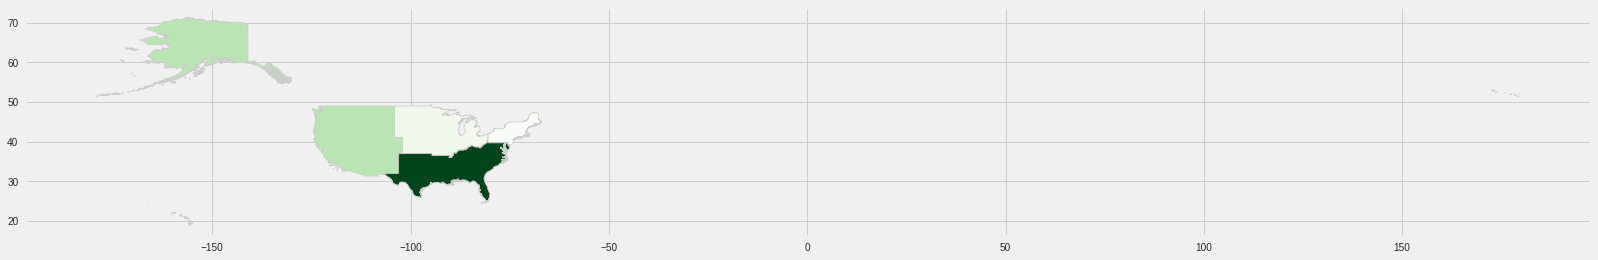

In [129]:
## graph details... 
## still need to figure out how to show max side dish for each region
## label each region according to its max side dish
## color each region differently
## there is also the possibility that I did not match regions in the data
## with the correct corresponding regions in the shapefile...
## also need to add labels to axis and a title to the plot..
variable = 'Salad'

vmin, vmax = 0, 0

fig, ax = plt.subplots(1, figsize=(25, 20))

merged.plot(column=variable, cmap='Greens', linewidth=0.8, ax=ax, edgecolor='0.8')